In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
# put diad fit somewhere
#sys.path.append(r'C:\Users\penny\OneDrive - Oregon State University\Postdoc\MeltInclusion_SampleStuff\Peak_Fitting_Tests')
import DiadFit as pf
from lmfit.models import GaussianModel, VoigtModel, LinearModel, ConstantModel, QuadraticModel, LorentzianModel


## Put folder here

In [2]:
# Add the path with your spectra in
path=r'C:\Users\penny\OneDrive - Oregon State University\Postdoc\MeltInclusion_SampleStuff\Peak_Fitting_Tests\Example_notebooks_Spectra'
# Options, 'headless_txt', txt file with no title, 'Witec_ASCII' - witec txt with metadata, 'Renishaw_txt': txt with 2 headers, 'HORIBA_txt' - metadata+x-y- dat
filetype='Witec_ASCII'
#True if has witec '01' in front.
prefix=False 

In [3]:
Diad_files=pf.get_diad_files(path)

In [4]:
Diad_files

['56 MS14_11_MI1_50X.txt',
 'FG04_10_MI1_2.txt',
 'FG18_24_MI1 (CRR).txt',
 'FG18_6_MI1 (CRR).txt']

## Pick file here, e.g. each time scroll up to here and run the next cells

56 MS14_11_MI1_50X.txt
56 MS14_11_MI1_50X.txt


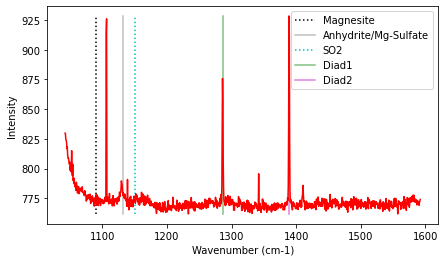

In [5]:
#filename=Diad_files[0] # or put ='FG04_10_MI1_2.txt'
filename='56 MS14_11_MI1_50X.txt'
print(filename)
pf.plot_diad(path=path, filename=filename, filetype=filetype)

### This cell determins whether you want to proceed to fit a carbonate peak

In [6]:
# If you select True, you can tweak the fit, if False, it will just run onto the next cell. 
fit_carbonate=False

# You can exclude a range here, e.g. if you have a nasty Cosmic ray
exclude_range=None#[1080, 1088]

# This selects the two background positions
lower_range=[1060, 1065]
upper_range=[1120, 1130]

# This sets the peak center, you can tweak if needed
cent=1090

# Tweak degree of poylnomial fitting the background
N_poly=1

# Select sigma level, e.g. discard points in background N* sigma outside mean
outlier_sigma=12

# N PEAKS - if you want approx peak positionYs
N_peaks=3

# Amplitude, may need to tweak
amplitude=1000


Carb_fit, xx_carb, y_carb, result0=pf.fit_carbonate_peak(path=path, 
filename=filename, filetype=filetype,
lower_range=lower_range, upper_range=upper_range, cent=cent, exclude_range=exclude_range,
N_poly=N_poly, outlier_sigma=outlier_sigma, N_peaks=N_peaks, amplitude=amplitude,
distance = 10, prominence=5, width=6  , threshold=0.1, fit_carbonate=fit_carbonate)
Carb_fit

## Plot diads to have a look, and get approx peak positions
- Choose how many peaks you want with

56 MS14_11_MI1_50X.txt
Using initial estimates: Diad1+HB=[1285.9], Diad2+HB=[1388.8 1410.5]


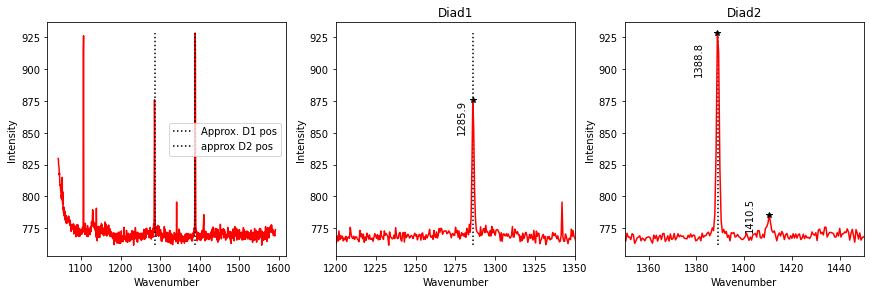

In [7]:
# If you have cosmic rays, you can remove up to 2 segments here (more if you ask penny nicely)
exclude_range1=None#[1320, 1340]#None
exclude_range2=None#[1236, 1250]
# Specify the number of peaks, e.g. 2 if have HB, 3 for Diad2 if have HB + C13, 1 if no HB
n_peaks_diad1=1
n_peaks_diad2=2

diad1_peaks, diad2_peaks=pf.identify_diad_peaks(path=path, filename=filename, filetype=filetype,
n_peaks_diad1=n_peaks_diad1, n_peaks_diad2=n_peaks_diad2,                                      
exclude_range1=exclude_range1,  exclude_range2=exclude_range2,
height = 400, threshold = 0.5, distance = 5, prominence=10, width=0.5)

In [8]:
# Uncomment this if you have no diads, it will export the carbonate peak parameters
#pf.proceed_to_fit_diads(filename, Carb_fit)

## Fit Diad 1

56 MS14_11_MI1_50X.txt
2.7758310046216037
Error bars not determined by function
1199.5469822068885
1199.7491414108572
56 MS14_11_MI1_50X.txt


C:\Users\penny\OneDrive - Oregon State University\Postdoc\MeltInclusion_SampleStuff\Peak_Fitting_Tests\Example_notebooks_Spectra\DiadFit.py:2202: UserWarning: Attempting to set identical bottom == top == 1.6174270618619944 results in singular transformations; automatically expanding.
  axes['B'].set_ylim([min(y_best_fit)-fitspan/5, max(y_best_fit)+fitspan/5])


C:\Users\penny\OneDrive - Oregon State University\Postdoc\MeltInclusion_SampleStuff\Peak_Fitting_Tests\Example_notebooks_Spectra


,Diad1_Cent,Diad1_Area,HB1_Cent,HB1_Area,Residual
0,1199.749141,0.00001,1199.546982,0.000004,3.599981


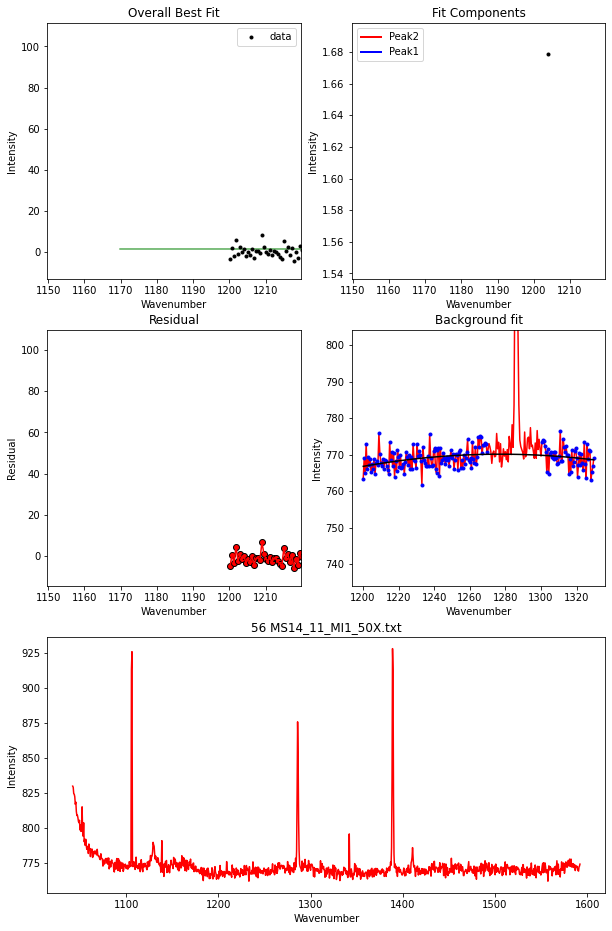

In [9]:
# If you enter a number here, it will fit a Gaussian background centered near the peak pos.. Else, if None, it wont.  Gaussian or not, either enter approximate center of Guassian, or None
peak_pos_gauss=None#(1250)
# Degree of polynomail for the background
N_poly_bck_diad1=2
# LH range to use as baseline for the diad
lower_baseline_diad1=[1200, 1270]
# RH range to use as baseline for the diad
upper_baseline_diad1=[1300, 1330]
## Change amplitude
amplitude=50


Diad1_fit, result_diad1, best_fit_diad1, xdat_diad1=pf.fit_diad_1_w_bck(path=path, 
filename=filename, filetype=filetype,
exclude_range1=exclude_range1, exclude_range2=exclude_range2,
N_poly_bck_diad1=N_poly_bck_diad1, lower_baseline_diad1=lower_baseline_diad1,
upper_baseline_diad1=upper_baseline_diad1,
peak_pos_voigt=diad1_peaks, peak_pos_gauss=peak_pos_gauss, amplitude=amplitude)
Diad1_fit

In [10]:
    # Calculating residuals
    # Y evaluated at actual axes
    result_diad1_origx=result.eval(x=xdat)
    residual_diad1_coords=ydat-result_diad1_origx
    residual_diad1=np.sum(((ydat-result_diad1_origx)**2)**0.5)/(len(ydat))
    df_out['Residual']=residual_diad1
    
    result, df_out, y_best_fit, x_lin, components, xdat, ydat, ax1_xlim, ax2_xlim, peak_pos_gauss, residual_diad1_coords

array([1256.04541989, 1256.0754349 , 1256.10544991, ..., 1315.98538988,
       1316.01540488, 1316.04541989])

## Fit diad 2

56 MS14_11_MI1_50X.txt
3.767811232320991
not None
made df


,Diad2_Cent,Diad2_Area,HB2_Cent,HB2_Area
0,1389.021241,280.280039,1410.457086,33.734462


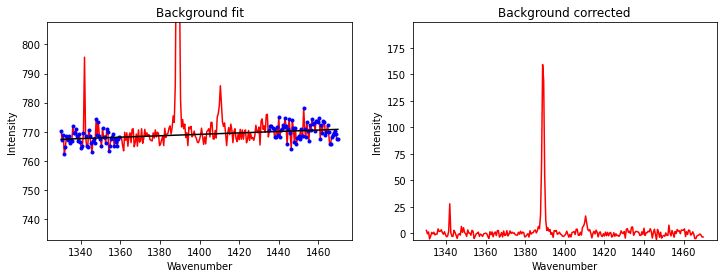

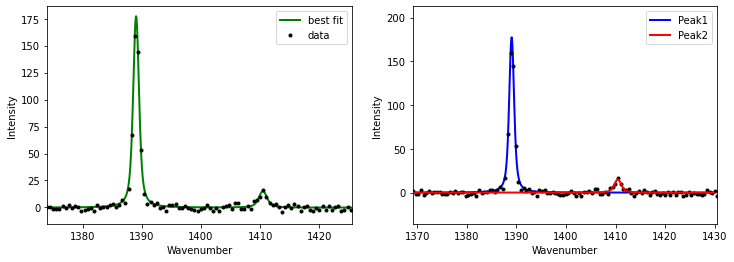

In [19]:
# Gaussian or not, either enter approximate center of Guassian, or None
peak_pos_gauss=None#(1340)
# Degree of polynomail for the background
N_poly_bck_diad2=1
# LH range to use as baseline for the diad
lower_baseline_diad2=[1330, 1360]
# RH range to use as baseline for the diad
upper_baseline_diad2=[1435, 1470]
# Tweak amplitude if needed
amplitude=60
# This then takes these inputs and feeds them into the function
Diad2_fit, result_diad2, best_fit_diad2, xdat_diad2 =pf.fit_diad_2_w_bck(path=path, filename=filename, filetype=filetype, peak_pos_voigt=diad2_peaks,
exclude_range1=exclude_range1, exclude_range2=exclude_range2, N_poly_bck_diad2=N_poly_bck_diad2, 
lower_baseline_diad2=lower_baseline_diad2, upper_baseline_diad2=upper_baseline_diad2, peak_pos_gauss=peak_pos_gauss, amplitude=amplitude)
Diad2_fit

## Combine and copy to clipboard!

In [20]:
out=pf.combine_diad_outputs(filename=filename, prefix=prefix, Diad1_fit=Diad1_fit, 
                        Diad2_fit=Diad2_fit, Carb_fit=Carb_fit)
out

,filename,Splitting,Diad1_Cent,Diad1_Area,Diad2_Cent,Diad2_Area,HB1_Cent,HB1_Area,HB2_Cent,HB2_Area,C13_Cent,C13_Area
0,56 MS14_11_MI1_50X,102.975821,1286.04542,194.52524,1389.021241,280.280039,NaN,0,1410.457086,33.734462,NaN,0


In [ ]:
xdat, ydat
y_best_fit=result.eval(x=x_lin)